In [4]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [5]:
import nltk

In [6]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [7]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize

In [8]:
para= 'This is the data science class. The class started in the month of December. it is going well.'

In [9]:
for sentence in sent_tokenize(para):
  print(sentence, word_tokenize(sentence))

This is the data science class. ['This', 'is', 'the', 'data', 'science', 'class', '.']
The class started in the month of December. ['The', 'class', 'started', 'in', 'the', 'month', 'of', 'December', '.']
it is going well. ['it', 'is', 'going', 'well', '.']


In [10]:
sent_tokenize('This is the data science class. The class started in the month of December.')

['This is the data science class.',
 'The class started in the month of December.']

In [11]:
word_tokenize('This is the data science class')

['This', 'is', 'the', 'data', 'science', 'class']

In [12]:
from google.colab import files
uploaded= files.upload()

Saving SMSSpamCollection to SMSSpamCollection


In [13]:
df= pd.read_csv('SMSSpamCollection',sep='\t',header=None,names=['labels','msg'])

In [14]:
df.head()

,labels,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.shape

(5572, 2)

In [16]:
df['len']= df['msg'].apply(len)

In [17]:
df

,labels,msg,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


array([[<Axes: title={'center': 'len'}>]], dtype=object)

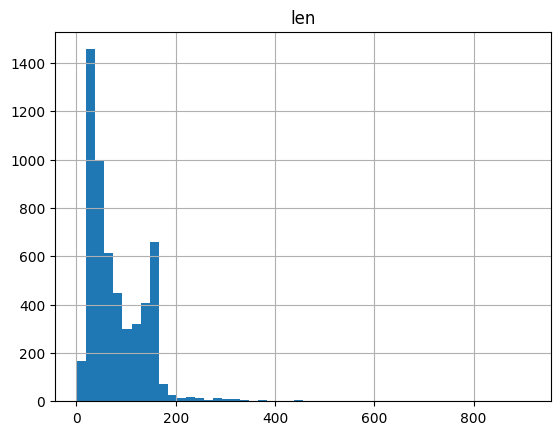

In [18]:
df.hist('len',bins=50)

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

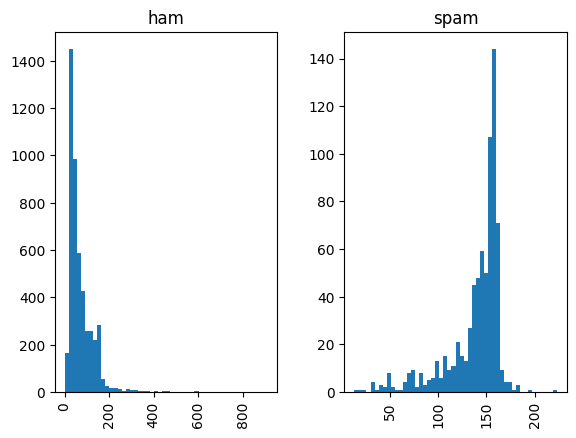

In [19]:
df.hist('len',by='labels',bins=50)

In [20]:
df['len'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: len, dtype: float64

In [21]:
df[df.len==910].iloc[0,1]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [22]:
df[df.len==100].iloc[3,1]

"That's good. Lets thank God. Please complete the drug. Have lots of water. And have a beautiful day."

In [23]:
df[df.len==910]

,labels,msg,len
1085,ham,For me the love should start with attraction.i...,910


Data Cleaning

In [24]:
sent='This is data science class((*(**%%^&^^)))'

In [25]:
import string

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
from nltk.corpus import stopwords
stop=list(stopwords.words('english'))
punc= list(string.punctuation)
stop_punc= stop+punc
stop_punc

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
stem= PorterStemmer()

In [30]:
stem.stem('drinking')

'drink'

In [31]:
lem= WordNetLemmatizer()

In [32]:
lem.lemmatize('playing',pos='v')

'play'

In [33]:
import spacy


In [34]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [35]:
!pip install spacy

In [36]:
nlp= spacy.load('en_core_web_sm')

In [37]:
sentence= 'Data science class is going well and will end in the month  of march 24.it is a emerging course in modern era. using python can be performed'

In [38]:
doc=nlp(sentence)

In [39]:
for token in doc:
  print(token.text,token.pos_,spacy.explain(token.pos_),token.tag_,token.is_stop,token.is_punct,token.like_num,token.lemma_)


Data NOUN noun NNS False False False datum
science NOUN noun NN False False False science
class NOUN noun NN False False False class
is AUX auxiliary VBZ True False False be
going VERB verb VBG False False False go
well ADV adverb RB True False False well
and CCONJ coordinating conjunction CC True False False and
will AUX auxiliary MD True False False will
end VERB verb VB False False False end
in ADP adposition IN True False False in
the DET determiner DT True False False the
month NOUN noun NN False False False month
  SPACE space _SP False False False  
of ADP adposition IN True False False of
march PROPN proper noun NNP False False False march
24.it NUM numeral CD False False False 24.it
is AUX auxiliary VBZ True False False be
a DET determiner DT True False False a
emerging VERB verb VBG False False False emerge
course NOUN noun NN False False False course
in ADP adposition IN True False False in
modern ADJ adjective JJ False False False modern
era NOUN noun NN False False False e

In [40]:
def clean_words(title):
  doc= nlp(title)
  clean_text= [x.lemma_ for x in doc if not x.is_stop and not x.is_punct and not x.like_num]
  clean_text=[stem.stem(x) for x in clean_text]
  return clean_text

In [41]:
clean_words("aren't you happy since yesterday 9 ?")

['happi', 'yesterday']

In [42]:
for token in doc.ents:
  print(token.text,token.label_,spacy.explain(token.label_),token.start_char,token.end_char)


the month  of march 24.it DATE Absolute or relative dates or periods 49 74


In [43]:
spacy.displacy.render(doc,style='ent',jupyter=True)

In [44]:
corpus=['this is the data science class with SL',
       'AI is the next class',
       'and this is third class',
       'and this is fourth class']

In [45]:
count= CountVectorizer(ngram_range=(1,1))

In [46]:
x=count.fit_transform(corpus)

In [47]:
print(count.get_feature_names_out())

['ai' 'and' 'class' 'data' 'fourth' 'is' 'next' 'science' 'sl' 'the'
 'third' 'this' 'with']


In [48]:
x.toarray()

array([[0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1],
       [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]])

In [49]:
tfidf= TfidfTransformer()

In [50]:
bag=tfidf.fit_transform(x)

In [51]:
bag.toarray()

array([[0.        , 0.        , 0.22103912, 0.42357521, 0.        ,
        0.22103912, 0.        , 0.42357521, 0.42357521, 0.33395156,
        0.        , 0.27036257, 0.42357521],
       [0.56199026, 0.        , 0.29326983, 0.        , 0.        ,
        0.29326983, 0.56199026, 0.        , 0.        , 0.44307958,
        0.        , 0.        , 0.        ],
       [0.        , 0.49144966, 0.32528549, 0.        , 0.        ,
        0.32528549, 0.        , 0.        , 0.        , 0.        ,
        0.62334157, 0.39787085, 0.        ],
       [0.        , 0.49144966, 0.32528549, 0.        , 0.62334157,
        0.32528549, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.39787085, 0.        ]])

In [52]:
count= CountVectorizer(ngram_range=(1,1),analyzer=clean_words)

In [53]:
x= count.fit_transform(df['msg'])

In [54]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:
x.shape

(5572, 7192)

In [56]:
x.size

42546

In [57]:
bag= tfidf.fit_transform(x)

In [58]:
bag.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
mult= MultinomialNB()

In [60]:
mult.fit(bag,df['labels'])

MultinomialNB()

In [61]:
y_pred= mult.predict(bag)
y_pred


array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [62]:
accuracy_score(df['labels'],y_pred)

0.9809763101220388

In [63]:
print(classification_report(df['labels'],y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.86      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.93      0.96      5572
weighted avg       0.98      0.98      0.98      5572



In [64]:
from sklearn.pipeline import Pipeline

In [65]:
x_train,x_test,y_train,y_test= train_test_split(df['msg'],df['labels'],train_size=0.75,random_state=100)

In [66]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [67]:
pipeline=Pipeline([('count',CountVectorizer(ngram_range=(1,1),analyzer=clean_words)),('tfidf',TfidfTransformer()),('multnaive',MultinomialNB())])

In [68]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('count',
                 CountVectorizer(analyzer=<function clean_words at 0x78417cf670a0>)),
                ('tfidf', TfidfTransformer()), ('multnaive', MultinomialNB())])

In [69]:
y_pred= pipeline.predict(x_test)

In [70]:
accuracy_score(y_test,y_pred)

0.9633883704235463

## Emotion Mining

In [71]:
from google.colab import files
uploaded=files.upload()

Saving apple.txt to apple.txt


In [72]:
df= pd.read_csv('apple.txt',on_bad_lines='skip')

In [73]:
df.head()

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""


In [74]:
sent='this is data science class       /       '

In [75]:
sent.strip()

'this is data science class       /'

In [76]:
df=[x.strip() for x in df.x] ## remove the spaces between the paragraph

In [77]:
df

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [78]:
text=''.join(df)

In [79]:
text

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and codersFinally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by workin

In [80]:
import wordcloud

In [81]:
!pip install wordcloud

In [82]:
from wordcloud import WordCloud,STOPWORDS

In [83]:
stop=set(STOPWORDS)

In [84]:
def func(wordcloud):
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.savefig('apple.png',format='png')

In [85]:
wordcloud= WordCloud(stopwords=stop,width=2000,height=2000,background_color='white',max_words=100,colormap='Set3').generate(text)

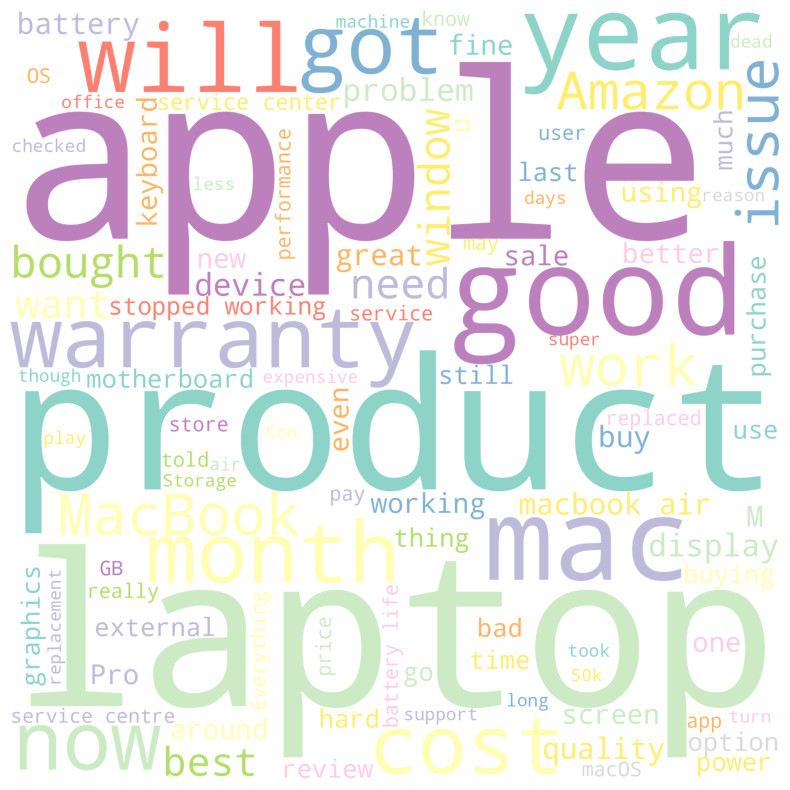

In [86]:
func(wordcloud)

In [87]:
doc=nlp(df[2])

In [88]:
spacy.displacy.render(doc,style='ent',jupyter=True)

In [89]:
doc=nlp(df[2])

In [90]:
doc

Best Laptop under 60k. If you don't want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it's battery life with sleek look 😍Now talking about MS officeIt's available on app store, free for 1 monthAfter that you will have to pay.You cannot install pirated version but if you install Windows 7 or any other version then u can use Ms office for freeBut in MacBook there are other apps which are good substitute for Ms office appsNumbers for ExcelPages for wordKeynote for PowerPointAnd you can convert your numbers file to Excel file or csv fileSame for the pages & keynoteSo no need of Ms office for me.Cons1. U cannot play games, your laptop will just heat up, battery will drain* U cannot play pubg mobile on emulator if you are pubg lover😁2. Storage 128gb, it will work fine but if you want to store movies or TV shows u can't, u have to buy external hard disk

In [91]:
for token in doc:
  print(token.text,token.pos_,spacy.explain(token.pos_),token.is_stop,token.is_punct,token.is_alpha,token.tag_,token.like_num)

Best ADJ adjective False False True JJS False
Laptop PROPN proper noun False False True NNP False
under ADP adposition True False True IN False
60k NOUN noun False False False NNS False
. PUNCT punctuation False True False . False
If SCONJ subordinating conjunction True False True IN False
you PRON pronoun True False True PRP False
do AUX auxiliary True False True VBP False
n't PART particle True False False RB False
want VERB verb False False True VB False
any DET determiner True False True DT False
accounting NOUN noun False False True NN False
softwares NOUN noun False False True NNS False
like ADP adposition False False True IN False
tally NOUN noun False False True NN False
or CCONJ coordinating conjunction True False True CC False
busy ADJ adjective False False True JJ False
then ADV adverb True False True RB False
go VERB verb True False True VB False
for ADP adposition True False True IN False
it PRON pronoun True False True PRP False
, PUNCT punctuation False True False , Fals

In [92]:
noun_verb_adj=[token.text for token in doc if token.pos_ in ['NOUN','VERB','ADJ']]

In [93]:
print(noun_verb_adj)

['Best', '60k', 'want', 'accounting', 'softwares', 'tally', 'busy', 'go', 'better', 'windows', 'term', 'love', 'battery', 'life', 'sleek', 'look', 'talking', 'available', 'app', 'store', 'free', 'have', 'pay', 'install', 'pirated', 'version', 'install', 'other', 'version', 'use', 'office', 'are', 'other', 'apps', 'good', 'substitute', 'office', 'appsNumbers', 'wordKeynote', 'convert', 'numbers', 'file', 'file', 'csv', 'fileSame', 'pages', 'need', 'office', 'Cons1', 'play', 'games', 'laptop', 'heat', 'battery', 'drain', '*', 'play', 'mobile', 'emulator', 'Storage', 'gb', 'work', 'want', 'store', 'movies', 'TV', 'shows', 'have', 'buy', 'external', 'hard', 'disk']


In [94]:
count= CountVectorizer()

In [95]:
x=count.fit_transform(noun_verb_adj)

In [96]:
count.vocabulary_.items()

dict_items([('best', 8), ('60k', 0), ('want', 56), ('accounting', 1), ('softwares', 46), ('tally', 51), ('busy', 10), ('go', 24), ('better', 9), ('windows', 57), ('term', 52), ('love', 33), ('battery', 7), ('life', 31), ('sleek', 45), ('look', 32), ('talking', 50), ('available', 6), ('app', 2), ('store', 48), ('free', 21), ('have', 27), ('pay', 41), ('install', 29), ('pirated', 42), ('version', 55), ('other', 39), ('use', 54), ('office', 38), ('are', 5), ('apps', 3), ('good', 25), ('substitute', 49), ('appsnumbers', 4), ('wordkeynote', 58), ('convert', 13), ('numbers', 37), ('file', 19), ('csv', 14), ('filesame', 20), ('pages', 40), ('need', 36), ('cons1', 12), ('play', 43), ('games', 22), ('laptop', 30), ('heat', 28), ('drain', 16), ('mobile', 34), ('emulator', 17), ('storage', 47), ('gb', 23), ('work', 59), ('movies', 35), ('tv', 53), ('shows', 44), ('buy', 11), ('external', 18), ('hard', 26), ('disk', 15)])

In [97]:
x.toarray().shape

(72, 60)

In [98]:
len(noun_verb_adj)

72

In [99]:
two_dim= np.arange(0,12).reshape(3,4)
two_dim

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [100]:
two_dim.sum(axis=0)

array([12, 15, 18, 21])

In [101]:
sum_x=x.sum(axis=0)
sum_x
sum_x.shape

(1, 60)

In [102]:
for i ,j in count.vocabulary_.items():
  print(i,sum_x[0,j])

best 1
60k 1
want 2
accounting 1
softwares 1
tally 1
busy 1
go 1
better 1
windows 1
term 1
love 1
battery 2
life 1
sleek 1
look 1
talking 1
available 1
app 1
store 2
free 1
have 2
pay 1
install 2
pirated 1
version 2
other 2
use 1
office 3
are 1
apps 1
good 1
substitute 1
appsnumbers 1
wordkeynote 1
convert 1
numbers 1
file 2
csv 1
filesame 1
pages 1
need 1
cons1 1
play 2
games 1
laptop 1
heat 1
drain 1
mobile 1
emulator 1
storage 1
gb 1
work 1
movies 1
tv 1
shows 1
buy 1
external 1
hard 1
disk 1


In [103]:
word_freq= [(i,sum_x[0,j]) for i,j in count.vocabulary_.items()]
word_freq= sorted(word_freq,reverse=True,key=lambda x:x[1])
word_df= pd.DataFrame(word_freq,columns=['word','count'])
word_df[0:10]

,word,count
0,office,3
1,want,2
2,battery,2
3,store,2
4,have,2
5,install,2
6,version,2
7,other,2
8,file,2
9,play,2


<Axes: title={'center': 'Top Repeated word'}, xlabel='word'>

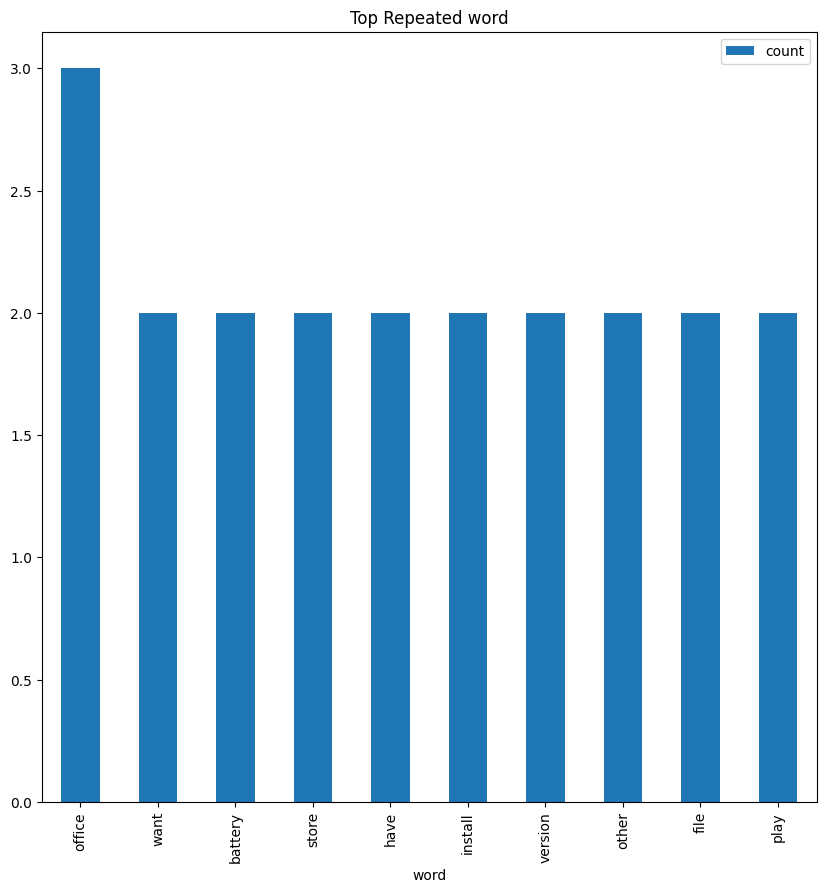

In [104]:
word_df[0:10].plot(kind='bar',x='word',title='Top Repeated word',figsize=(10,10))

In [105]:
from google.colab import files
upload=files.upload()

Saving Afinn.csv to Afinn.csv


In [106]:
aff= pd.read_csv('Afinn.csv',encoding='latin-1')

In [107]:
aff.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [108]:
df

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [113]:
sentence=sent_tokenize(text)
sent_df= pd.DataFrame(sentence,columns=['sentence'])
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
160,"Coming to the performance, the speed of this i..."
161,You can get one of the best movie experiences ...
162,Overall I would it a 4.5/5.I got a great deal ...
163,I got it not only on discount but also was abl...


In [116]:
dict1={'age':[1,2,3,4],'name':['a','b''c','d']}

In [117]:
dict1.get('age')

[1, 2, 3, 4]

In [118]:
aff_dict= aff.set_index('word')['value'].to_dict()

In [119]:
aff_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [130]:
aff_dict.get('flops',0)

-2

In [146]:
def sent_count(text:str=None):
  sent_count=0
  if text:
    doc= nlp(text)
    for word in doc:
      sent_count += aff_dict.get(word.lemma_,0)
    return sent_count

In [147]:
sent_count('i am so happy and sad from past two days')

1

In [141]:
sent_df

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
160,"Coming to the performance, the speed of this i..."
161,You can get one of the best movie experiences ...
162,Overall I would it a 4.5/5.I got a great deal ...
163,I got it not only on discount but also was abl...


In [148]:
sent_df['sentiment_count']= sent_df['sentence'].apply(sent_count)

In [149]:
sent_df

,sentence,sentiment_count
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,5
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11
...,...,...
160,"Coming to the performance, the speed of this i...",2
161,You can get one of the best movie experiences ...,3
162,Overall I would it a 4.5/5.I got a great deal ...,3
163,I got it not only on discount but also was abl...,0


In [151]:
sent_df['word_count']= sent_df['sentence'].str.split().apply(len)

In [152]:
sent_df

,sentence,sentiment_count,word_count
0,It's amazing..... battery last around 10 -12 h...,7,16
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,5,31
3,Terrific sense of possession & pride.Bad News.,4,7
4,Problems will be there if you are switching fr...,-11,65
...,...,...,...
160,"Coming to the performance, the speed of this i...",2,27
161,You can get one of the best movie experiences ...,3,12
162,Overall I would it a 4.5/5.I got a great deal ...,3,23
163,I got it not only on discount but also was abl...,0,18


In [153]:
sent='iam very happy'

In [154]:
len(sent.split())

3

In [155]:
sent_df['index']= range(0,len(sent_df))

In [156]:
sent_df

,sentence,sentiment_count,word_count,index
0,It's amazing..... battery last around 10 -12 h...,7,16,0
1,Got it in 50k in Diwali sale.,0,7,1
2,Technically good laptop.Good News.luxury produ...,5,31,2
3,Terrific sense of possession & pride.Bad News.,4,7,3
4,Problems will be there if you are switching fr...,-11,65,4
...,...,...,...,...
160,"Coming to the performance, the speed of this i...",2,27,160
161,You can get one of the best movie experiences ...,3,12,161
162,Overall I would it a 4.5/5.I got a great deal ...,3,23,162
163,I got it not only on discount but also was abl...,0,18,163


In [157]:
import seaborn as sns

<Axes: xlabel='index', ylabel='sentiment_count'>

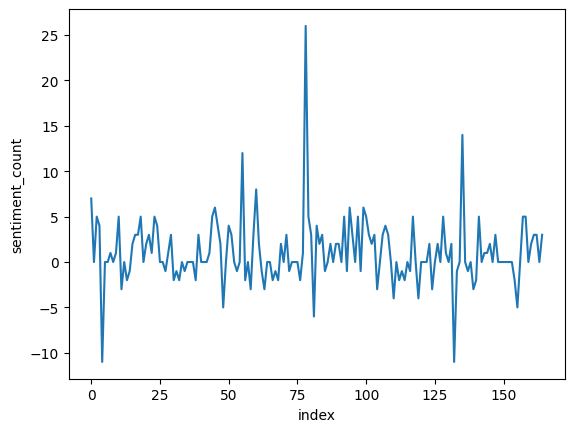

In [160]:
sns.lineplot(data=sent_df,x='index',y='sentiment_count')

<ipython-input-161-d285ed45eb2c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_count'])


<Axes: xlabel='sentiment_count', ylabel='Density'>

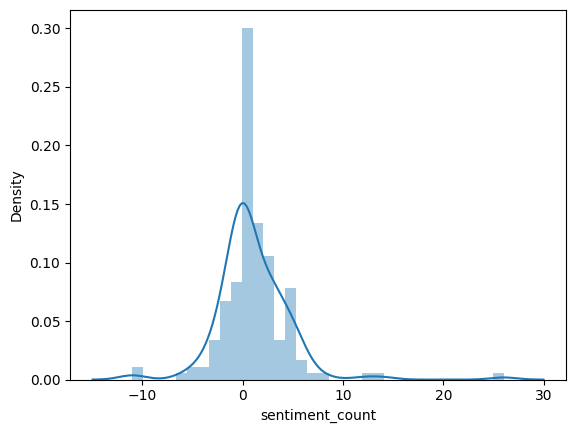

In [161]:
sns.distplot(sent_df['sentiment_count'])

array([[<Axes: title={'center': 'sentiment_count'}>]], dtype=object)

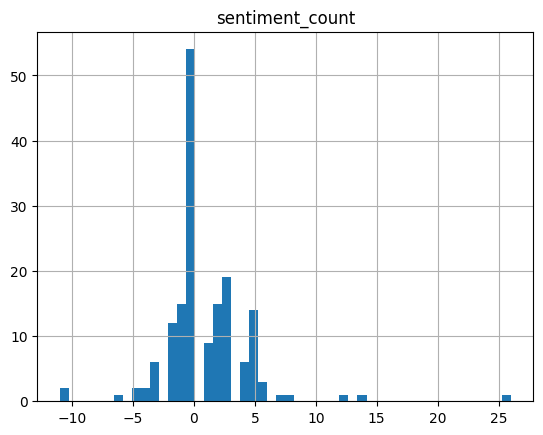

In [162]:
sent_df.hist('sentiment_count',bins=50)

In [164]:
sent_df[sent_df['sentiment_count']==0].shape

(54, 4)

In [165]:
54/165

0.32727272727272727